# Quiz 4 - Harris Corner Detector
#### Edson Roteia Araujo Junior e João Pedro Moreira Ferreira

### Instructions
- Implement algorithm HARRIS’ detector (page 84 Trucco and Verri).
- For each fixed pair of values of the algorithm parameters, measure the robustness of your implementation with synthetic images of squares corrupted by increasing amounts of Gaussian noise, as follows:
    - record the Root Mean Square (RMS) distance of the estimated corners from the true positions
    - the number of spurious corners
    - the number of missed corners. 
- Plot these values in three graphs, against the standard deviation of the noise. Compare with cv2.cornerHarris from OpenCV (https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html).

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

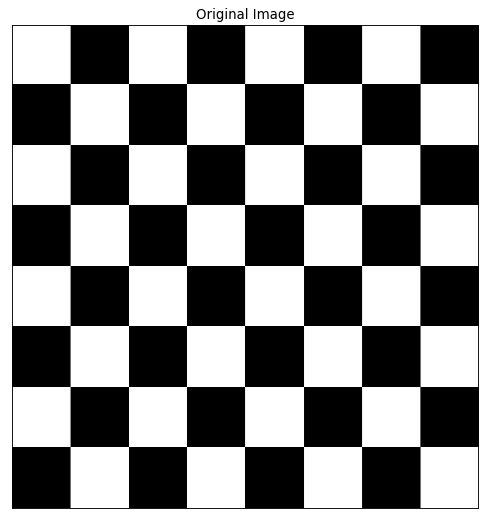

(1280, 1236)


In [2]:
filename = 'imgs/chess.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.title('Original Image') 
plt.show()
print(gray.shape)

### Generate synthetic image

(640, 640, 3)


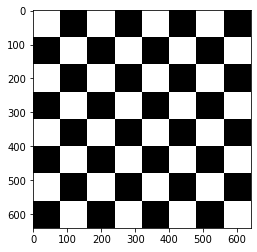

In [3]:
myimg = np.zeros([640,640,3], dtype=np.uint8)
print(myimg.shape)
white = [255,255,255]
black = [0,0,0]
sqrsize = 80
for i in range(myimg.shape[0]):
    for j in range(myimg.shape[1]):
        if int(i /sqrsize) % 2 == int(j /sqrsize) % 2:
            myimg[i][j] = white
        else:
            myimg[i][j] = black
            
mygray = cv2.cvtColor(myimg,cv2.COLOR_RGB2GRAY)

plt.imshow(myimg);

img = myimg
gray = mygray

### OpenCV implementation of Harris algorithm

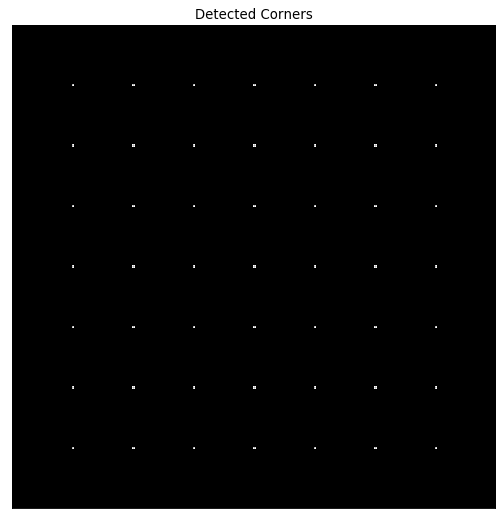

196


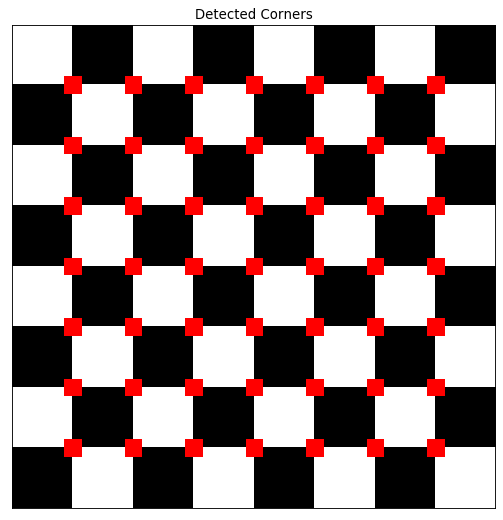

In [4]:
dst = cv2.cornerHarris(mygray,2,3,0.0)
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(dst, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('Detected Corners') 
plt.show()

window_size = 6
for c_i in range(window_size,dst.shape[0] - window_size):
    for c_j in range(window_size, dst.shape[1] - window_size):
        for i in range(c_i - window_size, c_i + window_size):
            for j in range(c_j - window_size, c_j + window_size):
                if (dst[i][j] > dst[c_i][c_j]):
                    dst[c_i][c_j] = 0
                    break

print(np.count_nonzero(dst))


#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,np.ones((5,5)),iterations = 5)

imgcorners = img.copy()
# Threshold for an optimal value, it may vary depending on the image.
imgcorners[dst>0.01*dst.max()]=[0,0,255]
imgcorners = cv2.cvtColor(imgcorners, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(imgcorners)
plt.xticks([]),plt.yticks([])
plt.title('Detected Corners') 
plt.show()

### Implementation of Harris Algorithm 

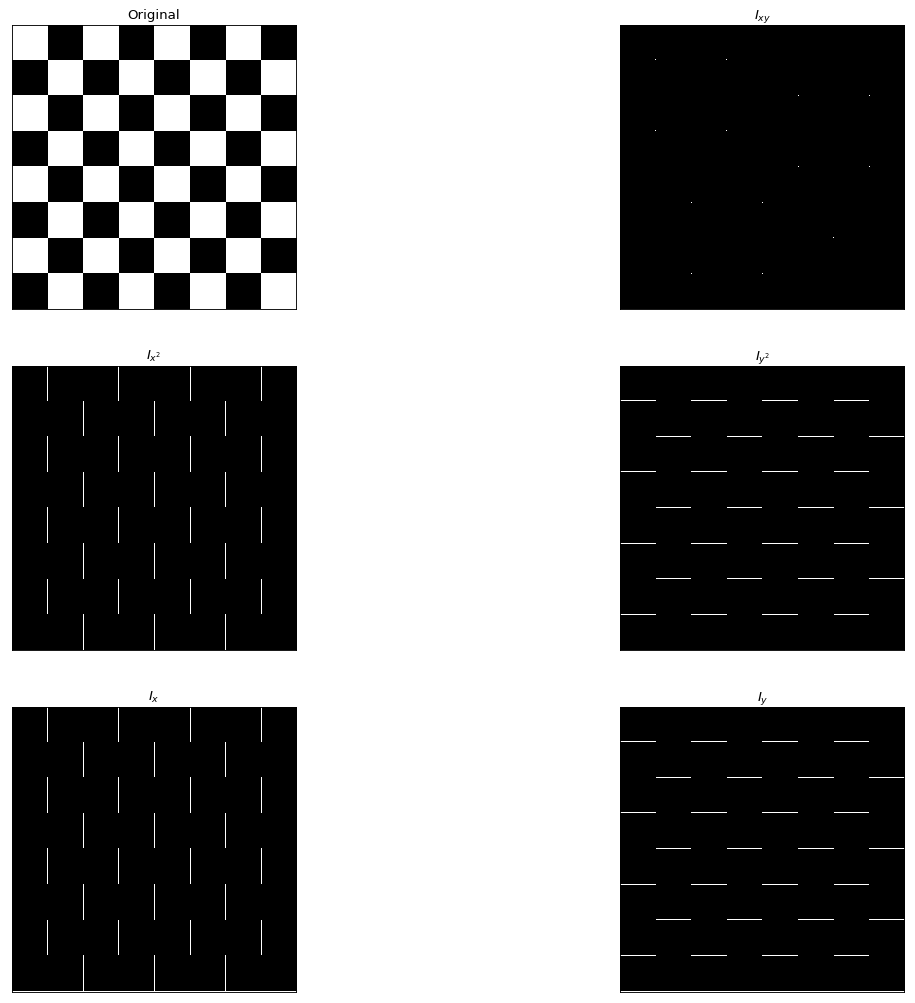

In [5]:
sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
I_x = cv2.filter2D(gray,-1,sobel_x)
I_y = cv2.filter2D(gray,-1,sobel_y)
I_xy = np.multiply(I_x,I_y)
I_x2 = np.multiply(I_x,I_x)
I_y2 = np.multiply(I_y,I_y)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(321),plt.imshow(gray, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(I_xy, cmap='gray')
plt.title('$I_{xy}$'), plt.xticks([]), plt.yticks([])

plt.subplot(323),plt.imshow(I_x2, cmap='gray')
plt.title('$I_{x^2}$'), plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(I_y2, cmap='gray')
plt.title('$I_{y^2}$'), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(I_x, cmap='gray')
plt.title('$I_x$'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(I_y, cmap='gray')
plt.title('$I_y$'), plt.xticks([]), plt.yticks([])
plt.show()

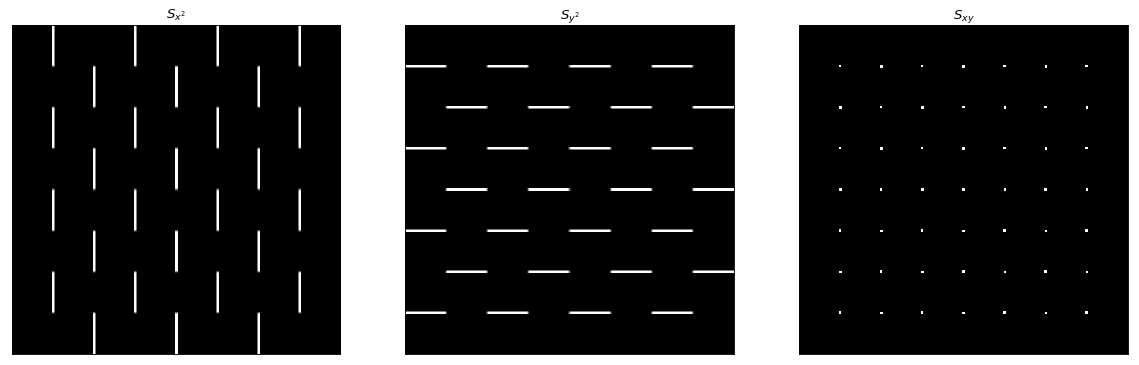

In [6]:
s_x2 = cv2.filter2D(I_x2,-1,np.ones((5,5))) 
s_y2 = cv2.filter2D(I_y2,-1,np.ones((5,5)))
s_xy = cv2.filter2D(I_xy,-1,np.ones((5,5)))

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.imshow(s_x2, cmap='gray')
plt.title('$S_{x^2}$'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(s_y2, cmap='gray')
plt.title('$S_{y^2}$'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(s_xy, cmap='gray')
plt.title('$S_{xy}$'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
##SLIDES
k = 0.04
threshold = 1
out = np.zeros(gray.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        C = None
        C = np.array([[s_x2[i][j],s_xy[i][j]],[s_y2[i][j],s_xy[i][j]]])
        R = np.linalg.det(C) - k*((np.trace(C))**2)
        if R > threshold:
            out[i][j] = R
            
# Non-maximal Supression
for c_i in range(3,out.shape[0] - 3):
    for c_j in range(3, out.shape[1] - 3):
        for i in range(c_i - 3, c_i + 3):
            for j in range(c_j - 3, c_j + 3):
                if (out[i][j] > out[c_i][c_j]):
                    out[c_i][c_j] = 0
                    break
print(out)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


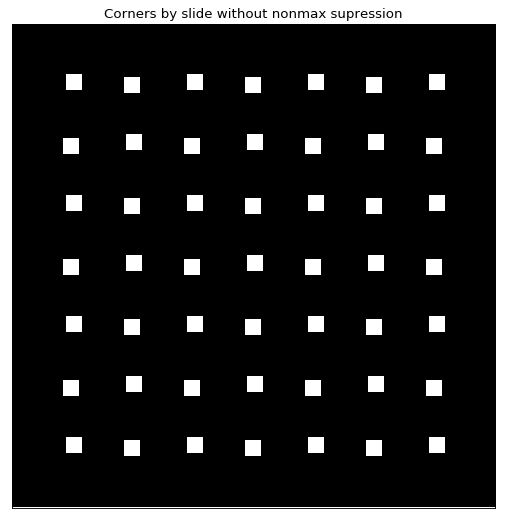

In [8]:
out_dilated = cv2.dilate(out,np.ones((5,5)),iterations = 5)

fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(out_dilated,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('Corners by slide without nonmax supression') 
plt.show()

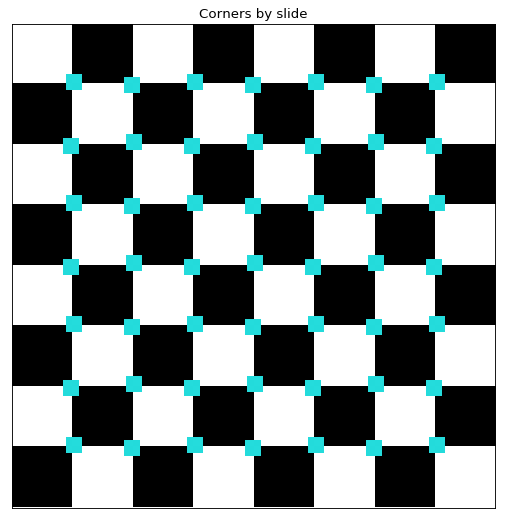

In [9]:
out_slide = img.copy()
out_slide[:,:,0] = out_slide[:,:,0] + out_dilated * 255

out_slide[:,:,1] = out_slide[:,:,1] - out_dilated * 255
out_slide[:,:,2] = out_slide[:,:,2] - out_dilated * 255
    
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(out_slide)
plt.xticks([]),plt.yticks([])
plt.title('Corners by slide') 
plt.show()

In [10]:
###BOOK CODE
k = 0.04
threshold2 = 0.8
possible_corners = []
dtype=[('eig', float), ('i', int), ('j', int)]
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        C = None
        C = np.array([[s_x2[i][j],s_xy[i][j]],[s_y2[i][j],s_xy[i][j]]])
        smallest_eigen_value = np.min(np.linalg.eig(C)[0])
        if smallest_eigen_value > threshold2:
            possible_corners.append((smallest_eigen_value,i,j))
possible_corners = np.array(possible_corners,dtype=dtype)
possible_corners = np.sort(possible_corners, order='eig')   


In [11]:
print(len(possible_corners))

49


In [12]:
# todelete = np.unique(np.array(todelete))
# todelete
# print (len(todelete),len(possible_corners),len(possible_corners)-len(todelete))
# for idx in enumerate(possible_corners):
#     if idx in todelete
corners = possible_corners.copy()
# corners = np.delete(corners,todelete)


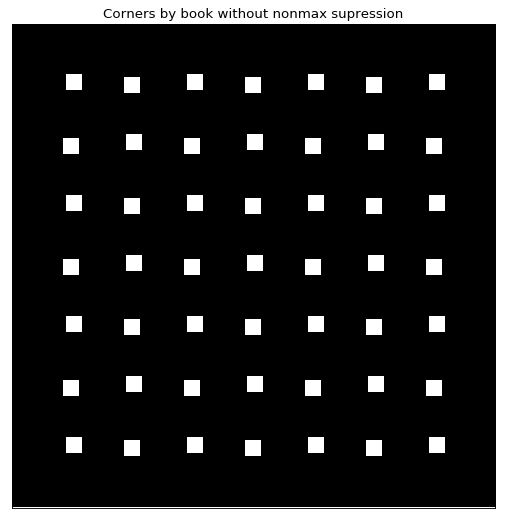

In [13]:
out_book = np.zeros(gray.shape)
for e,i,j in corners:
    out_book[i][j] = 1.0
out_book_dilated = cv2.dilate(out_book,np.ones((5,5)),iterations = 5)
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(out_book_dilated,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title('Corners by book without nonmax supression') 
plt.show()

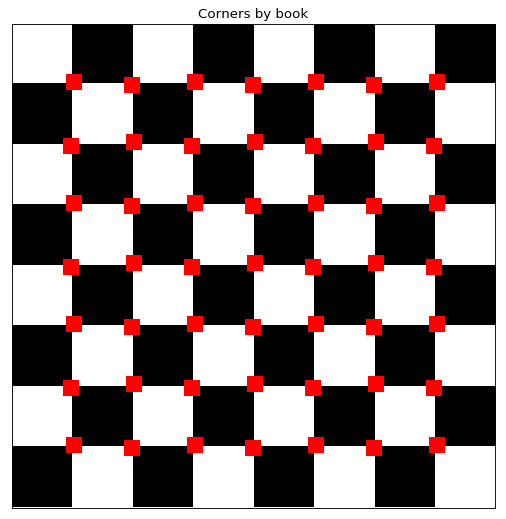

In [14]:
out_book_2 = img.copy()
out_book_2[:,:,0] = out_book_2[:,:,0] + out_book_dilated * 255

out_book_2[:,:,1] = out_book_2[:,:,1] - out_book_dilated * 255
out_book_2[:,:,2] = out_book_2[:,:,2] - out_book_dilated * 255
    
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(out_book_2)
plt.xticks([]),plt.yticks([])
plt.title('Corners by book') 
plt.show()

In [15]:
out_book_2.shape

(640, 640, 3)

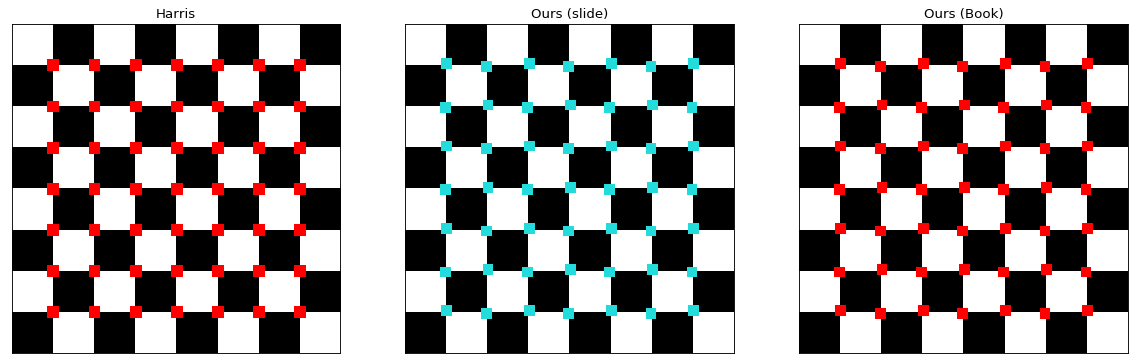

In [16]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.imshow(imgcorners)
plt.title('Harris'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(out_slide)
plt.title('Ours (slide)'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(out_book_2)
plt.title('Ours (Book)'), plt.xticks([]), plt.yticks([])
plt.show()

## Evaluation

### Defining Methods

In [17]:
def applyGaussianNoise(img, sigma):
    row,col,ch = img.shape
    noise = np.random.normal(0,sigma,(row,col,ch))
    noise = noise.reshape(row,col,ch)
    img = np.uint8(np.clip(np.around(img + noise), 0, 255))
    return img

In [18]:
def rmsd(distances):
    return np.sqrt(np.mean(distances * distances))

def euclideanDistance(gt, predicted, threshold):
    pcorners = []
    spurious = 0
    missing = 0
    
    for corner in gt:
        missingFlag = True
        for point in predicted:
            distance = np.sqrt((point[0] - corner[0])**2 + (point[1] - corner[1])**2)
            if distance < threshold:
                pcorners.append(distance)
                missingFlag = False
        if missingFlag:
            missing = missing + 1
            
    for point in predicted:
        spuriousFlag = True
        for corner in gt:
            distance = np.sqrt((point[0] - corner[0])**2 + (point[1] - corner[1])**2)
            if distance < threshold:
                spuriousFlag = False
        if spuriousFlag:
            spurious = spurious + 1
    return np.array(pcorners), missing, spurious
        
def runAndEvaluateCv2(imgs):
    rmsds = []
    missings = []
    spuriouses = []
    for img in imgs:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        dst = cv2.cornerHarris(gray,2,3,0.0)
        predicted_corners_cv2 = np.where(dst > 0)
        predicted_corners_cv2 = np.array(list(zip(predicted_corners_cv2[0], predicted_corners_cv2[1])))

        distances_cv2, missing_cv2, spurious_cv2 = euclideanDistance(ground_truth_corners, predicted_corners_cv2, 7)
        rmsds.append(rmsd(distances_cv2))
        missings.append(missing_cv2)
        spuriouses.append(spurious_cv2)
    return rmsds, missings, spuriouses

def runAndEvaluateBook(imgs):
    rmsds = []
    missings = []
    spuriouses = []
    for img in imgs:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
        sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
        I_x = cv2.filter2D(gray,-1,sobel_x)
        I_y = cv2.filter2D(gray,-1,sobel_y)
        I_xy = np.multiply(I_x,I_y)
        I_x2 = np.multiply(I_x,I_x)
        I_y2 = np.multiply(I_y,I_y)
        s_x2 = cv2.filter2D(I_x2,-1,np.ones((5,5))) 
        s_y2 = cv2.filter2D(I_y2,-1,np.ones((5,5)))
        s_xy = cv2.filter2D(I_xy,-1,np.ones((5,5)))
        
        k = 0.04
        threshold2 = 0.8
        
        possible_corners = []
        dtype=[('eig', float), ('i', int), ('j', int)]
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                C = None
                C = np.array([[s_x2[i][j],s_xy[i][j]],[s_y2[i][j],s_xy[i][j]]])
                smallest_eigen_value = np.min(np.linalg.eig(C)[0])
                if smallest_eigen_value > threshold2:
                    possible_corners.append((smallest_eigen_value,i,j))
        possible_corners = np.array(possible_corners,dtype=dtype)
        possible_corners = np.sort(possible_corners, order='eig')   
        corners = possible_corners.copy()
        out_book = np.zeros(gray.shape)
        for e,i,j in corners:
            out_book[i][j] = 1.0
        predicted_corners_book = np.where(out_book > 0.0)
        predicted_corners_book = np.array(list(zip(predicted_corners_book[0], predicted_corners_book[1])))
        
        distances_book, missing_book, spurious_book = euclideanDistance(ground_truth_corners, predicted_corners_book, 7)
        rmsds.append(rmsd(distances_book))
        missings.append(missing_book)
        spuriouses.append(spurious_book)
    return rmsds, missings, spuriouses
    
def runAndEvaluateSlides(imgs):
    rmsds = []
    missings = []
    spuriouses = []
    for img in imgs:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
        sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
        I_x = cv2.filter2D(gray,-1,sobel_x)
        I_y = cv2.filter2D(gray,-1,sobel_y)
        I_xy = np.multiply(I_x,I_y)
        I_x2 = np.multiply(I_x,I_x)
        I_y2 = np.multiply(I_y,I_y)
        s_x2 = cv2.filter2D(I_x2,-1,np.ones((5,5))) 
        s_y2 = cv2.filter2D(I_y2,-1,np.ones((5,5)))
        s_xy = cv2.filter2D(I_xy,-1,np.ones((5,5)))
        
        k = 0.04
        threshold = 1
        
        out = np.zeros(gray.shape)
        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                C = None
                C = np.array([[s_x2[i][j],s_xy[i][j]],[s_y2[i][j],s_xy[i][j]]])
                R = np.linalg.det(C) - k*((np.trace(C))**2)
                if R > threshold:
                    out[i][j] = R
            
        # Non-maximal Supression
        for c_i in range(3,out.shape[0] - 3):
            for c_j in range(3, out.shape[1] - 3):
                for i in range(c_i - 3, c_i + 3):
                    for j in range(c_j - 3, c_j + 3):
                        if (out[i][j] > out[c_i][c_j]):
                            out[c_i][c_j] = 0
                            break
                            
        predicted_corners_slide = np.where(out > 0)
        predicted_corners_slide = np.array(list(zip(predicted_corners_slide[0], predicted_corners_slide[1])))
        
        distances_slide, missing_slide, spurious_slide = euclideanDistance(ground_truth_corners, predicted_corners_slide, 7)
        rmsds.append(rmsd(distances_slide))
        missings.append(missing_slide)
        spuriouses.append(spurious_slide)
        
    return rmsds, missings, spuriouses
    


### Creating Noisy Images

In [19]:
noisy_images = []
sigmas = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
# sigmas = [0]
for i in sigmas:
    noisy_images.append(applyGaussianNoise(img, i))
print (np.array(noisy_images).shape)

(7, 640, 640, 3)


### Getting Ground Truth Corners

In [20]:
ground_truth_corners = []
for i in range(sqrsize - 1, myimg.shape[0] - sqrsize, sqrsize):
    for j in range(sqrsize - 1, myimg.shape[1] - sqrsize, sqrsize):
        ground_truth_corners.append((i,j))
ground_truth_corners = np.array(list(ground_truth_corners))

### Getting Corners from Algorithms

In [21]:
predicted_corners_slide = np.where(out > 0)
predicted_corners_slide = np.array(list(zip(predicted_corners_slide[0], predicted_corners_slide[1])))
predicted_corners_book = np.where(out_book == 1)
predicted_corners_book = np.array(list(zip(predicted_corners_book[0], predicted_corners_book[1])))
predicted_corners_cv2 = np.where(dst > 0)
predicted_corners_cv2 = np.array(list(zip(predicted_corners_cv2[0], predicted_corners_cv2[1])))

In [22]:
distances_book, missing_book, spurious_book = euclideanDistance(ground_truth_corners, predicted_corners_book, 7)
distances_slide, missing_slide, spurious_slide = euclideanDistance(ground_truth_corners, predicted_corners_slide, 7)
distances_cv2, missing_cv2, spurious_cv2 = euclideanDistance(ground_truth_corners, predicted_corners_cv2, 7)

In [23]:
print(rmsd(distances_book), missing_book, spurious_book)
print(rmsd(distances_slide), missing_slide, spurious_slide)
print(rmsd(distances_cv2), missing_cv2, spurious_cv2)

2.996596709057576 0 0
2.996596709057576 0 0
4.799425252946512 0 18816


In [24]:
resultsSlides = runAndEvaluateSlides(noisy_images)

In [25]:
resultsBook = runAndEvaluateBook(noisy_images)

In [26]:
resultsCv2 = runAndEvaluateCv2(noisy_images)

In [27]:
print(resultsSlides)

([4.852247293519607, 4.670259174255427, 4.674041791283714, 4.7679899130189956, 4.791117015883353, 4.739074121535952, 4.745839072887652], [1, 0, 0, 0, 0, 0, 0], [11071, 11483, 11345, 11418, 11411, 11754, 11750])


In [28]:
print(resultsBook)

([4.695783706196934, 4.6844151857435605, 4.7632728880702, 4.749739420482013, 4.828499540686301, 4.870795742257182, 4.835634870715199], [0, 0, 0, 0, 0, 0, 0], [125450, 157379, 168941, 178377, 178509, 184230, 188209])


In [29]:
print(resultsCv2)

([4.760307733304883, 4.784466357284726, 4.78604695887658, 4.795980374810582, 4.79677586929689, 4.798456410926418, 4.796258969130827], [0, 0, 0, 0, 0, 0, 0], [332529, 376530, 388348, 394032, 396833, 398834, 400024])


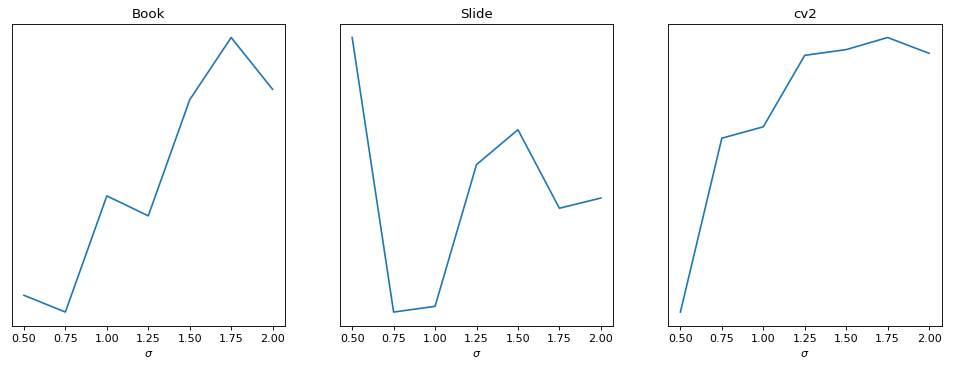

In [51]:
fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.plot(sigmas, resultsBook[0])
plt.title('Book'), plt.xticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]), plt.yticks([]),plt.xlabel('$\sigma$')
plt.subplot(132),plt.plot(sigmas, resultsSlides[0])
plt.title('Slide'), plt.xticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]), plt.yticks([]),plt.xlabel('$\sigma$')
plt.subplot(133),plt.plot(sigmas, resultsCv2[0])
plt.title('cv2'), plt.xticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]), plt.yticks([]),plt.xlabel('$\sigma$')
plt.show()

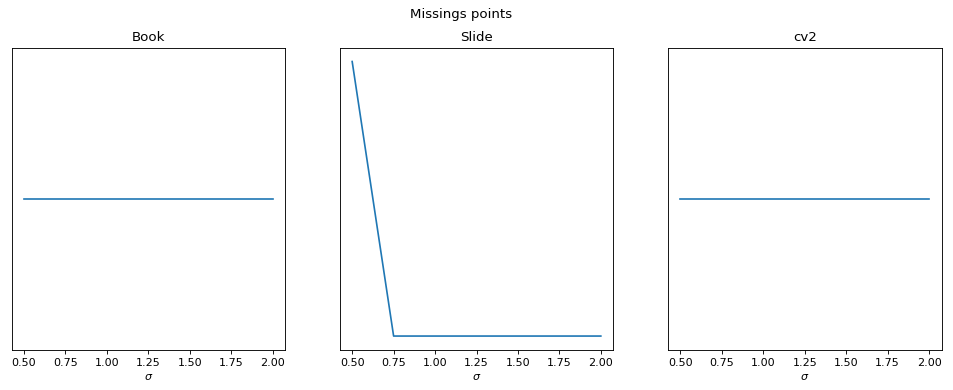

In [52]:
fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.plot(sigmas, resultsBook[1])
plt.title('Book'), plt.xticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]), plt.yticks([]),plt.xlabel('$\sigma$')
plt.subplot(132),plt.plot(sigmas, resultsSlides[1])
plt.title('Slide'), plt.xticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]), plt.yticks([]),plt.xlabel('$\sigma$')
plt.subplot(133),plt.plot(sigmas, resultsCv2[1])
plt.title('cv2'), plt.xticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]), plt.yticks([]),plt.xlabel('$\sigma$')
plt.suptitle('Missings points')
plt.show()

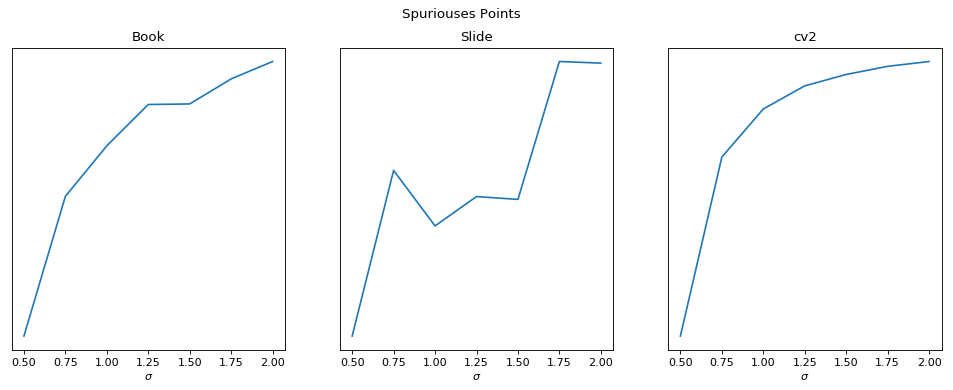

In [53]:
fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131),plt.plot(sigmas, resultsBook[2])
plt.title('Book'), plt.xticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]), plt.yticks([]),plt.xlabel('$\sigma$')
plt.subplot(132),plt.plot(sigmas, resultsSlides[2])
plt.title('Slide'), plt.xticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]), plt.yticks([]),plt.xlabel('$\sigma$')
plt.subplot(133),plt.plot(sigmas, resultsCv2[2])
plt.title('cv2'), plt.xticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]), plt.yticks([]),plt.xlabel('$\sigma$')
plt.suptitle('Spuriouses Points')
plt.show()

In this quiz we implement two algorithm: 1 following the instructions in the slide, and the other following the instructions in the book of Trucco and Verri. We show ours results in a syntetic image, and compare our results in the same image to the results of the Harris Detector algorithm implemented by the OpenCV library.